In [4]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('fake_clinic_data_extract_test.csv')


In [63]:
df

appointment_date clinic_name  patient_id  practitioner_id  \
0          2021-12-30    clinic_2       70172             1030   
1          2021-12-29    clinic_1       53371              756   
2          2021-12-29    clinic_2       69545             1030   
3          2021-12-27    clinic_1       43859              756   
4          2021-12-23    clinic_1       69303              756   
...               ...         ...         ...              ...   
4066       2021-08-19    clinic_1       44907              755   
4067       2021-09-02    clinic_1       45056              757   
4068       2021-08-19    clinic_1       44919              757   
4069       2021-07-22    clinic_1       45055              755   
4070       2021-07-22    clinic_1       44912              755   

      appointment_duration_min  revenues_from_appointment  
0                           30                      98.13  
1                           15                      65.13  
2                           30                     105.18  
3                           30                      58.11  
4                           30                     119.00  
...                        ...                        ...  
4066                        30                      83.87  
4067                        30                      79.91  
4068                        30                      90.10  
4069                        30                      90.90  
4070                        15                      65.13  

[4071 rows x 6 columns]

In [64]:
df['revenues_from_appointment']= df['revenues_from_appointment'].fillna(0) #Replacing NaN values with 0

In [65]:
df_c1= df[df["clinic_name"]=="clinic_1"]

In [67]:
df_c2= df[df["clinic_name"]=="clinic_2"]

In [69]:
df_c2

appointment_date clinic_name  patient_id  practitioner_id  \
0          2021-12-30    clinic_2       70172             1030   
2          2021-12-29    clinic_2       69545             1030   
8          2021-12-27    clinic_2       66365             1030   
15         2021-12-23    clinic_2       44234              741   
19         2021-12-15    clinic_2       67952              741   
...               ...         ...         ...              ...   
4057       2021-07-05    clinic_2       42261              741   
4058       2021-07-22    clinic_2       42681              741   
4059       2021-07-22    clinic_2       44938              741   
4060       2021-07-22    clinic_2       44803              741   
4061       2021-07-22    clinic_2       45117              741   

      appointment_duration_min  revenues_from_appointment  
0                           30                      98.13  
2                           30                     105.18  
8                           45                     213.59  
15                          15                      41.75  
19                          30                     122.80  
...                        ...                        ...  
4057                        30                     104.68  
4058                        30                     211.09  
4059                        30                     205.22  
4060                        30                     198.93  
4061                        30                     220.41  

[1642 rows x 6 columns]

In [ ]:
import pandas_ta

In [78]:
df_c2.set_index((df_c2['appointment_date']), inplace=True)
df_c2 = df_c2[['revenues_from_appointment']]
df_c2.ta.ema(close='revenue', length=10, append=True)
df_c2 = df_c2.iloc[10:]

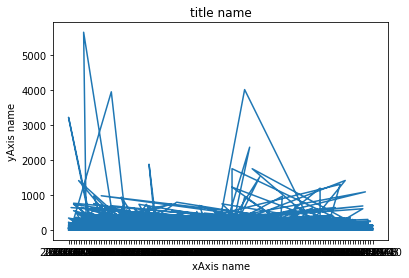

In [110]:
import matplotlib.pyplot as plt

plt.plot(df_c1.index,df_c1['revenues_from_appointment'])
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df_c2[['revenues_from_appointment']], df_c2[['EMA_10']], test_size=.2)

In [83]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[0.00109159]]
Mean Absolute Error: 142.9928883427956
Coefficient of Determination: -0.0010624472733875567


In [16]:
df_clinic_1 = pd.read_csv('E:/data/Clinic_1.csv',delimiter=';')
df_clinic_2 = pd.read_csv('E:/data/Clinic_2.csv',delimiter=';')

In [15]:
df_clinic_1

appointment_date  clinic_1
0           21-Jun         0
1           21-Jul     25623
2           21-Aug     46329
3           21-Sep     50428
4           21-Oct     47423
5           21-Nov     70091
6           21-Dec     67946

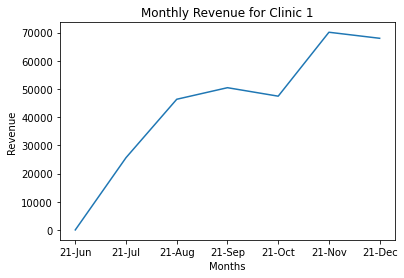

In [17]:
import matplotlib.pyplot as plt

plt.plot(df_clinic_1['appointment_date'],df_clinic_1['clinic_1'])
plt.title('Monthly Revenue for Clinic 1')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.show()

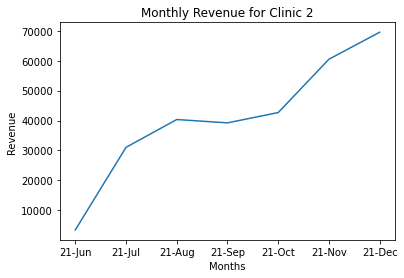

In [18]:
import matplotlib.pyplot as plt

plt.plot(df_clinic_2['appointment_date'],df_clinic_2['clinic_2'])
plt.title('Monthly Revenue for Clinic 2')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.show()

In [157]:
# X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(df_clinic_1.index), df_clinic_1[['clinic_1']], test_size=.1)

*Polynomial*

In [19]:
# 'from sklearn.linear_model import LinearRegression
# # Create Regression Model
# model = LinearRegression()
# # Train the model
# model.fit(pd.DataFrame(df_clinic_1.index), df_clinic_1[['clinic_1']])
# # Use model to make predictions
# y_pred = model.predict(pd.DataFrame(df_clinic_1.index))'

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias=False)
X_poly = poly.fit_transform(np.array(df_clinic_1.index).reshape(-1,1))
 
# poly.fit(X_poly, df_clinic_1[['clinic_1']])
lin2 = LinearRegression()
lin2.fit(X_poly, df_clinic_1[['clinic_1']])

LinearRegression()

In [50]:
y_pred = lin2.predict(X_poly)

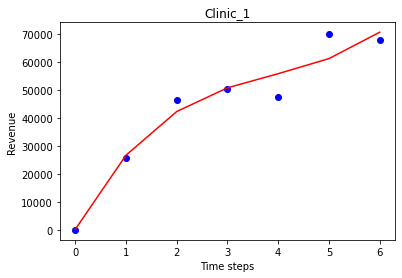

In [52]:
# Visualising the Polynomial Regression results
plt.scatter(pd.DataFrame(df_clinic_1.index), df_clinic_1[['clinic_1']], color = 'blue')

plt.plot(np.array(df_clinic_1.index), y_pred, color = 'red')
plt.title('Clinic_1')
plt.xlabel('Time steps')
plt.ylabel('Revenue')

plt.show()


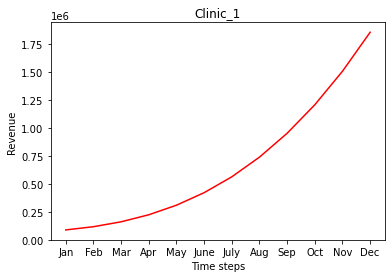

In [57]:
# Visualising the Polynomial Regression results
#plt.scatter(pd.DataFrame(df_clinic_1.index), df_clinic_1[['clinic_1']], color = 'blue')

plt.plot(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'], y_pred_test, color = 'red')
plt.title('Clinic_1')
plt.xlabel('Time steps')
plt.ylabel('Revenue')

plt.show()


In [54]:
X_poly_test = poly.transform(np.array([7,8,9,10,11,12,13,14,15,16,17,18]).reshape(-1,1))

In [55]:
y_pred_test = lin2.predict(X_poly_test)

In [56]:
y_pred_test

array([[  87879.71428571],
       [ 116604.07142856],
       [ 160571.33333331],
       [ 223512.16666664],
       [ 309157.2380952 ],
       [ 421237.21428566],
       [ 563482.76190469],
       [ 739624.54761896],
       [ 953393.23809513],
       [1208519.49999986],
       [1508733.99999984],
       [1857767.40476171]])

In [194]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(pd.DataFrame(df_clinic_2.index), df_clinic_2[['clinic_2']])
# Use model to make predictions
y_pred = model.predict(pd.DataFrame(df_clinic_2.index))

In [195]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias=False)
X_poly = poly.fit_transform(np.array(df_clinic_2.index).reshape(-1,1))
 
# poly.fit(X_poly, df_clinic_1[['clinic_1']])
lin2 = LinearRegression()
lin2.fit(X_poly, df_clinic_2[['clinic_2']])

LinearRegression()

In [196]:
y_pred = lin2.predict(X_poly)

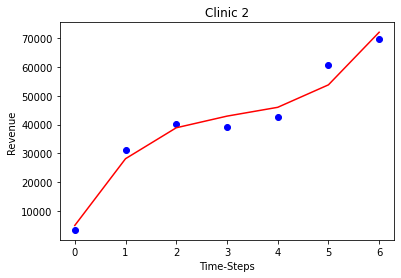

In [197]:
# Visualising the Polynomial Regression results
plt.scatter(pd.DataFrame(df_clinic_2.index), df_clinic_2[['clinic_2']], color = 'blue')

plt.plot(np.array(df_clinic_2.index), y_pred, color = 'red')
plt.title('Clinic 2')
plt.xlabel('Time-Steps')
plt.ylabel('Revenue')

plt.show()


In [198]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
# print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(df_clinic_2[['clinic_2']], y_pred))
# print("Coefficient of Determination:", r2_score(y_test, y_pred))


Mean Absolute Error: 3163.625850339845


In [163]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[10495.28571429]]


ValueError: Found input variables with inconsistent numbers of samples: [1, 7]

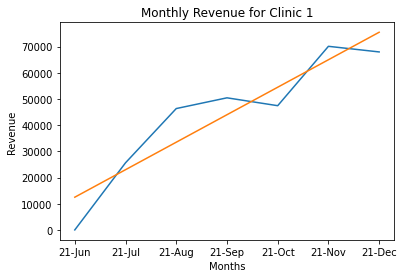

In [165]:
import matplotlib.pyplot as plt

plt.plot(df_clinic_1['appointment_date'],df_clinic_1['clinic_1'])
plt.plot(df_clinic_1['appointment_date'],y_pred)
plt.title('Monthly Revenue for Clinic 1')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.show()

In [166]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(pd.DataFrame(df_clinic_2.index), df_clinic_2[['clinic_2']])
# Use model to make predictions
y_pred = model.predict(pd.DataFrame(df_clinic_2.index))

In [167]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[9260.10714286]]


ValueError: Found input variables with inconsistent numbers of samples: [1, 7]

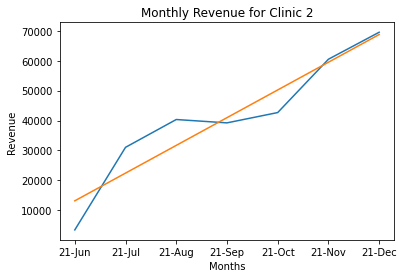

In [169]:
import matplotlib.pyplot as plt

plt.plot(df_clinic_2['appointment_date'],df_clinic_2['clinic_2'])
plt.plot(df_clinic_2['appointment_date'],y_pred)
plt.title('Monthly Revenue for Clinic 2')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.show()

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df_clinic_1[['Id']], df_clinic_1[['clinic_1']], test_size=.2)

In [118]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [97]:
df_base_c1 = df[df['clinic_name'] == "clinic_1"][['revenues_from_appointment']].reset_index(drop=True)

In [98]:
df_base_c2 = df[df['clinic_name'] == "clinic_2"][['revenues_from_appointment']].reset_index(drop=True)

In [100]:
df_base_c1['Id'] = df_base_c1.index
df_base_c2['Id'] = df_base_c2.index

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df_base_c2[['Id']], df_base_c2[['revenues_from_appointment']], test_size=.2)

In [106]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [182]:
#Revenue vs Appointment_time
fig=px.histogram(x=df.appointment_duration_min,y=df.revenues_from_appointment, color=df.clinic_name)
fig.show()


NameError: name 'px' is not defined

In [187]:
Y1= df[df['clinic_name']=='clinic_1']['revenues_from_appointment'].reset_index(drop=True)
Y2= df[df['clinic_name']=='clinic_2']['revenues_from_appointment'].reset_index(drop=True)

array([   0,    1,    2, ..., 4068, 4069, 4070])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

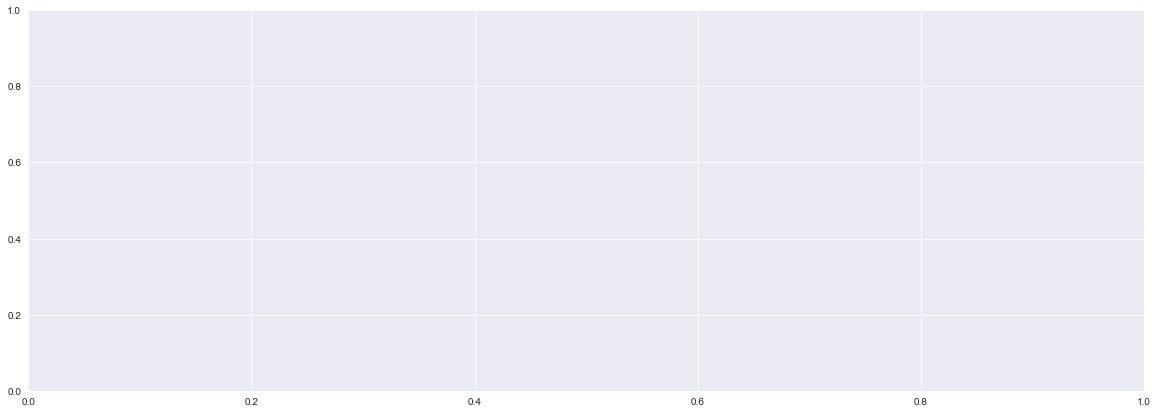

In [198]:
duration = df['appointment_duration_min']
#revenue = df['revenues_from_appointment']
# Y1= df[[df['clinic_name']=='clinic_1']]['revenues_from_appointment']
# Y2= df[[df['clinic_name']=='clinic_2']]['revenues_from_appointment']
 
# Figure Size
barWidth = 5.0
fig = plt.subplots(figsize =(20, 7))
X_axis = np.arange(len(duration))
# Horizontal Bar Plot
# plt.bar(X_axis - 0.2 , Y1.values, label = 'Clinic1')
# plt.bar(X_axis + 0.2, Y2.values, label = 'Clinic2')

plt.xticks(X_axis, duration)
plt.xlabel("Duration")
plt.ylabel("Revenue")

plt.hist(duration, density=False, bins=8)
# plt.xlabel('Duration', fontweight ='bold', fontsize = 15)
# plt.ylabel('Revenue', fontweight ='bold', fontsize = 15)
# Show Plot
plt.show()

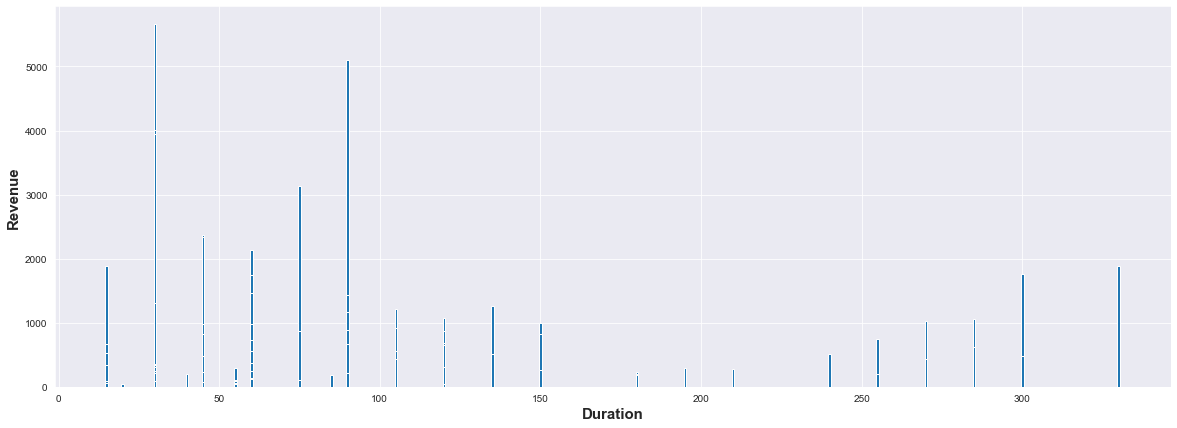

In [184]:
duration = df['appointment_duration_min']
revenue = df['revenues_from_appointment']

# Figure Size
barWidth = 5.0
fig = plt.subplots(figsize =(20, 7))

 
# Horizontal Bar Plot
plt.bar(duration, revenue)


# plt.xticks(X_axis, duration)
# plt.xlabel("Duration")
# plt.ylabel("Revenue")

plt.xlabel('Duration', fontweight ='bold', fontsize = 15)
plt.ylabel('Revenue', fontweight ='bold', fontsize = 15)
# Show Plot
plt.show()

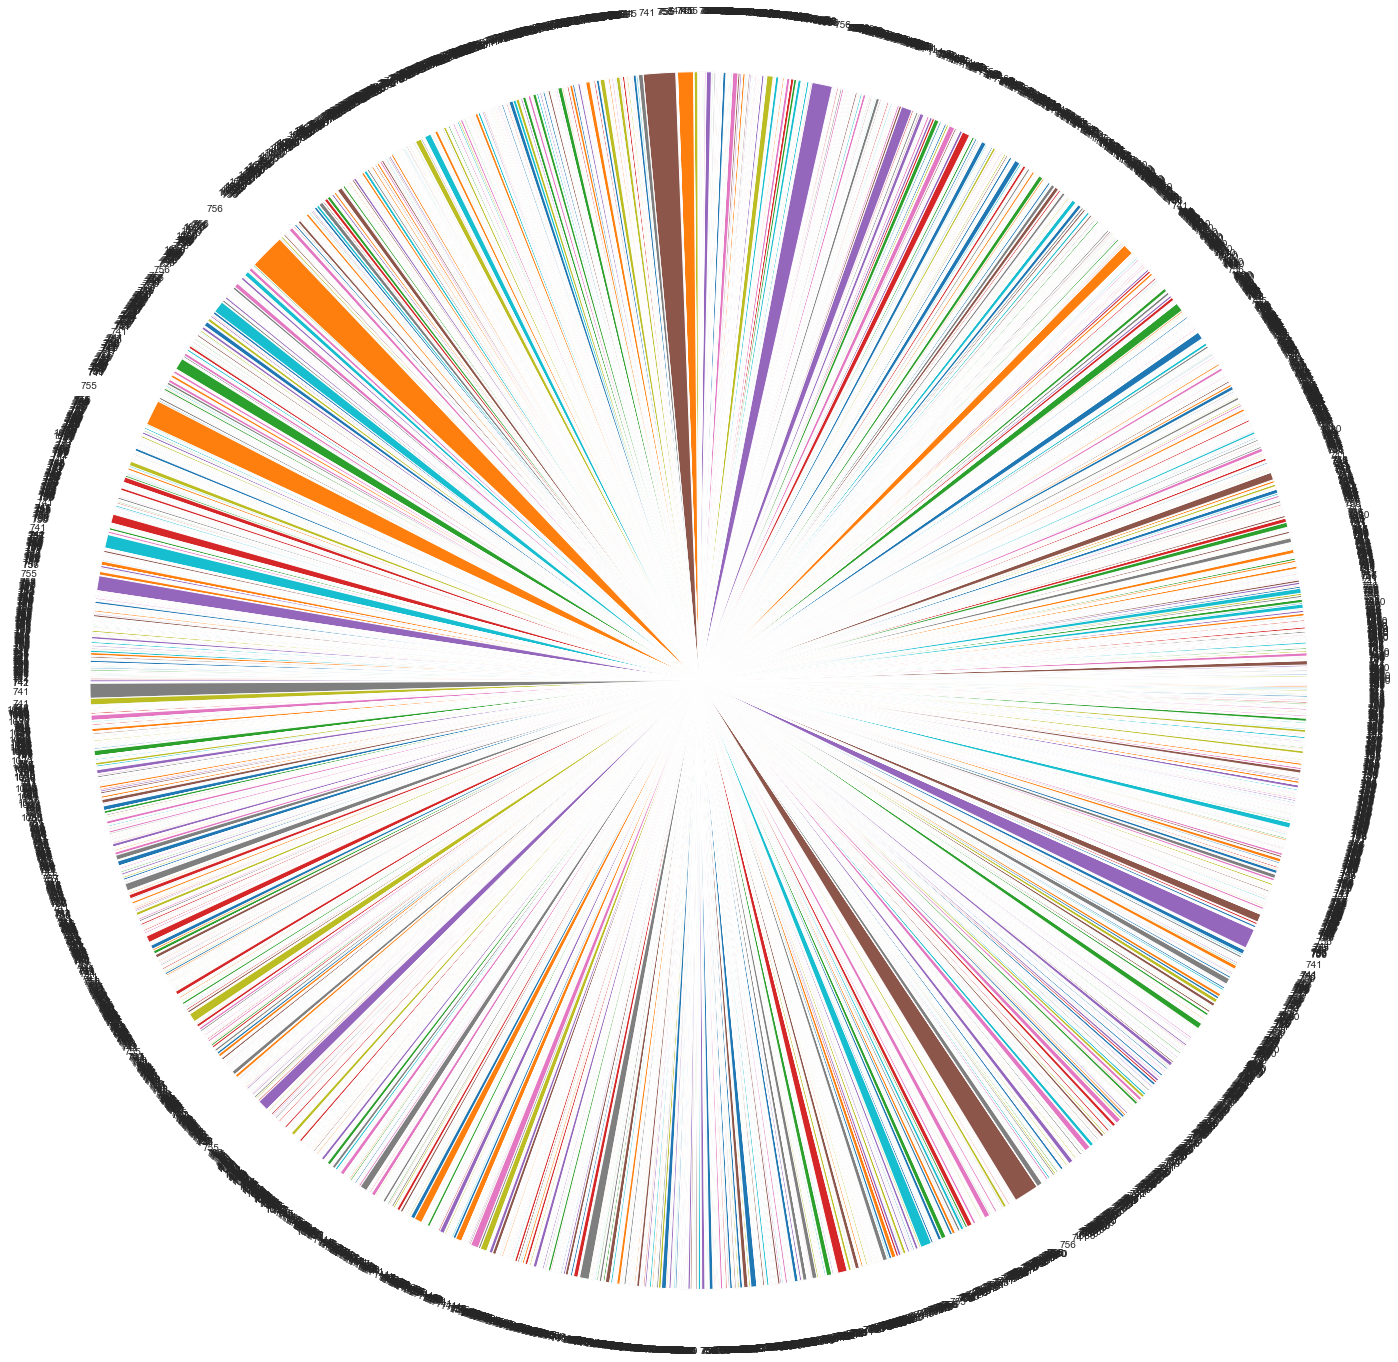

In [203]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
# values= df['practitioner_id'].value_counts()
# labels= df['practitioner_id'].unique.tolist()
plt.pie(df['revenues_from_appointment'], labels = df['practitioner_id'],radius=4)
 
# # show plot
plt.show()




In [66]:
#Revenue wrt Clinics

fig=px.violin(x=df.clinic_name,y=df.revenues_from_appointment, color=df.clinic_name)
fig.show()

In [25]:
fig=px.scatter_matrix(df,dimensions=['appointment_duration_min','revenues_from_appointment','clinic_name']) #color=df.appointment_date)
fig.show()

In [49]:
#Patient with appointment_time>5

fig=px.histogram(x=df_p.appointment_duration_min,y=df_p.revenues_from_appointment, color=df_p.clinic_name, barmode='group')
fig.show()

In [163]:
import datetime
df['appointment_date'] = pd.to_datetime(df["appointment_date"], format='%Y-%m')
df['appointment_date'] = df.appointment_date.map(lambda x: x.strftime('%Y-%m'))

In [164]:
df_mon=df.appointment_date.value_counts().rename_axis('monthly').reset_index(name='p_count')

In [165]:
df_06=df[df['appointment_date']=='2021-06']
df_07=df[df['appointment_date']=='2021-07']
df_08=df[df['appointment_date']=='2021-08']
df_09=df[df['appointment_date']=='2021-09']
df_10=df[df['appointment_date']=='2021-10']
df_11=df[df['appointment_date']=='2021-11']
df_12=df[df['appointment_date']=='2021-12']

In [92]:
i6=df_06.appointment_duration_min.mean()
i7=df_07.appointment_duration_min.mean()
i8=df_08.appointment_duration_min.mean()
i9=df_09.appointment_duration_min.mean()
i10=df_10.appointment_duration_min.mean()
i11=df_11.appointment_duration_min.mean()
i12=df_12.appointment_duration_min.mean()

In [93]:
avg_time=[i6,i7,i8,i9,i10,i11,i12]

In [94]:
i6=df_06.revenues_from_appointment.mean()
i7=df_07.revenues_from_appointment.mean()
i8=df_08.revenues_from_appointment.mean()
i9=df_09.revenues_from_appointment.mean()
i10=df_10.revenues_from_appointment.mean()
i11=df_11.revenues_from_appointment.mean()
i12=df_12.revenues_from_appointment.mean()

In [95]:
avg_revenue=[i6,i7,i8,i9,i10,i11,i12]

In [96]:
df_mon['Avg_appointment_time']=avg_time
df_mon['Avg_revenue']=avg_revenue

In [97]:
df_mon

monthly  p_count  Avg_appointment_time  Avg_revenue
0  2021-12      843             34.821429   123.625357
1  2021-11      840             44.502212   125.384845
2  2021-09      678             43.692580   153.124770
3  2021-10      664             42.824484   132.227183
4  2021-08      566             42.349398   135.672425
5  2021-07      452             42.904762   155.491155
6  2021-06       28             39.110320   162.990036

In [101]:
fig=px.scatter(df_mon,x='Avg_appointment_time',y='Avg_revenue',size='p_count',color='monthly')
fig.show()

In [36]:
df_patient=df['patient_id'].value_counts().rename_axis('p_id').reset_index(name='count')

In [39]:
df_patient= df_patient[df_patient['count']>5]

In [41]:
x=[]
for i in df_patient.p_id:
    x.append(i)

In [42]:
df_p=df[df['patient_id'].isin(x)]

In [38]:
df_

appointment_date clinic_name  patient_id  practitioner_id  \
0             2021-12    clinic_2       70172             1030   
1             2021-12    clinic_1       53371              756   
2             2021-12    clinic_2       69545             1030   
3             2021-12    clinic_1       43859              756   
4             2021-12    clinic_1       69303              756   
...               ...         ...         ...              ...   
4066          2021-08    clinic_1       44907              755   
4067          2021-09    clinic_1       45056              757   
4068          2021-08    clinic_1       44919              757   
4069          2021-07    clinic_1       45055              755   
4070          2021-07    clinic_1       44912              755   

      appointment_duration_min  revenues_from_appointment  
0                           30                      98.13  
1                           15                      65.13  
2                           30                     105.18  
3                           30                      58.11  
4                           30                     119.00  
...                        ...                        ...  
4066                        30                      83.87  
4067                        30                      79.91  
4068                        30                      90.10  
4069                        30                      90.90  
4070                        15                      65.13  

[4071 rows x 6 columns]

## Regression Model ##


In [90]:
##Split data in train and test
train_percentage=80
train_final_index=round(len(df)*(train_percentage/100))
#df.set_index('appointment_date',inplace=True)
lasso_df= df.drop(columns=['clinic_name'])
X_train, X_test = lasso_df[0:train_final_index], lasso_df[train_final_index:]
y_train, y_test = lasso_df[['revenues_from_appointment']][0:train_final_index],lasso_df[['revenues_from_appointment']][train_final_index:]

In [95]:
##Application of Regression model and printing error metrics
lasso_reg = svm.SVR(kernel='linear',C=1.0, epsilon=0.3)
lasso_reg.fit(X_train, y_train)
joblib.dump(lasso_reg, "lasso_reg.h5")
y_pred = lasso_reg.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score - ', r2_score(y_test, y_pred))

RMSE : 0.25751349829719217
R2 score -  0.9999987635073294


C:\Users\Arvind Maan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
import joblib

In [80]:
from sklearn import svm

In [45]:
import lasso

In [13]:
from prophet import Prophet

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Root Mean Squared Error: 238.22204547951708
R2 score -  -0.05817000700232344


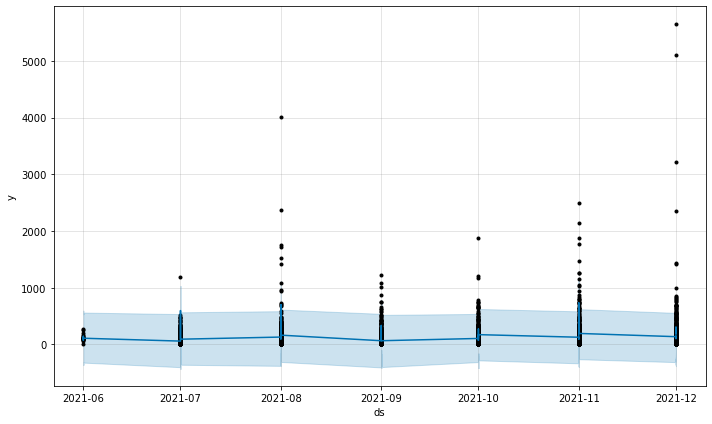

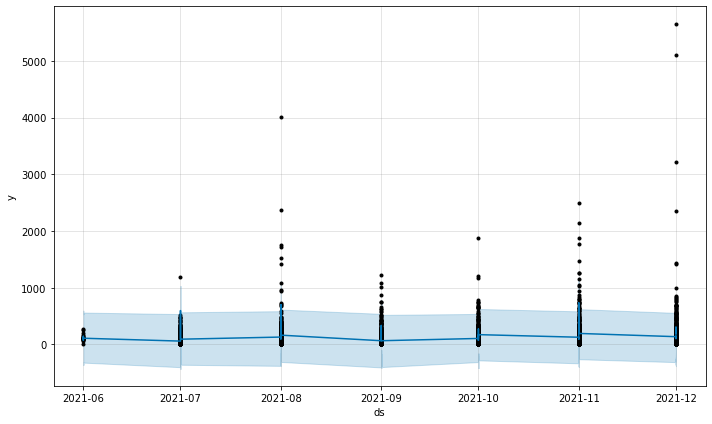

In [45]:
df.rename(columns={'revenues_from_appointment':'y', 'appointment_date':'ds'}, inplace=True)
# define the model
model = Prophet(yearly_seasonality=True, 
        weekly_seasonality=False,
        daily_seasonality=False, 
        interval_width=0.95,
               growth='linear')
model.add_seasonality(
        name='monthly', 
        period=30.5, 
        fourier_order=5
    )
#model.add_regressor('clinic_name')
# model.add_regressor('patient_id')
# model.add_regressor('practitioner_id')
model.add_regressor('appointment_duration_min')
# fit and predict test data using model
model.fit(X_train)
prediction = model.predict(X_test)
# # Save the model
# with open('fb_target_model.json', 'w') as fout:
#     json.dump(model_to_json(model), fout)df_future
# # Plot error metrics
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction['yhat'])))
print('R2 score - ', r2_score(y_test, prediction['yhat']))
model.plot(prediction)

## ARIMA Model ##

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
import os

from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA


Bad key text.latex.unicode in file C:\Users\Arvind Maan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\Arvind Maan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\Arvind Maan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://githu

In [ ]:
!pip uninstall statsmodels && pip install statsmodels --upgrade

In [6]:
def ad_test(dataset):
    
    dftest = adfuller(dataset, autolag = 'AIC')
    
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
         
         
ad_test(df['revenues_from_appointment'])

1. ADF :  -29.78241067385303
2. P-Value :  0.0
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 4067
5. Critical Values :
	 1% :  -3.4319589088195097
	 5% :  -2.8622509278295882
	 10% :  -2.5671484339024078


In [7]:
stepwise_fit = auto_arima(df['revenues_from_appointment'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=56140.695, Time=1.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=56134.856, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56136.278, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56136.316, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57427.698, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=56138.268, Time=0.36 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.639 seconds


In [25]:
X = df.revenues_from_appointment
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
test=test.tolist()
history = [x for x in train]
predictions = list()

In [31]:
for t in range(len(test)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    

predicted=317.445448, expected=96.760000
predicted=309.058962, expected=91.230000
predicted=284.284869, expected=119.680000
predicted=186.111187, expected=144.560000
predicted=191.627222, expected=0.000000
predicted=145.529219, expected=110.190000
predicted=106.723315, expected=103.320000
predicted=98.182856, expected=80.220000
predicted=86.797071, expected=129.180000
predicted=97.707795, expected=51.080000
predicted=91.083198, expected=41.710000
predicted=73.036607, expected=732.720000
predicted=181.676689, expected=85.050000
predicted=170.476263, expected=220.970000
predicted=184.539085, expected=409.760000
predicted=272.533571, expected=687.630000
predicted=316.378640, expected=52.620000
predicted=301.838757, expected=368.130000
predicted=373.179208, expected=429.000000
predicted=347.038590, expected=180.220000
predicted=316.847214, expected=0.000000
predicted=295.333200, expected=179.760000
predicted=283.500735, expected=450.420000
predicted=232.567936, expected=43.750000
predicted

In [27]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 265.689


In [36]:
rmse = sqrt(mean_squared_error(test, predictions[:815]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 265.689


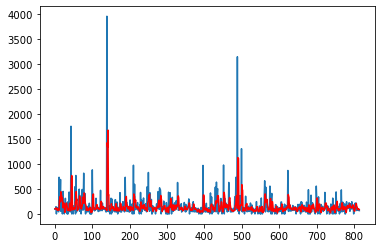

In [37]:
pyplot.plot(test)
pyplot.plot(predictions[:815], color='red')
pyplot.show()

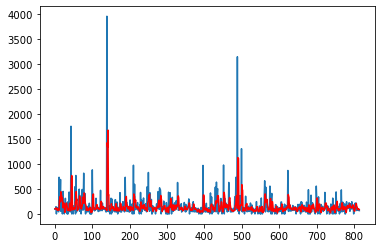

In [28]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

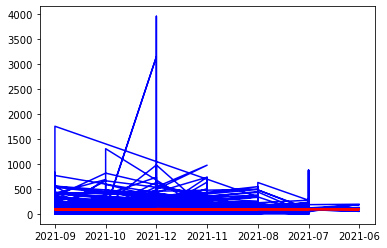

In [87]:
pyplot.plot(y_test, color='blue')
pyplot.plot(y_test['pred'], color='red')
pyplot.show()

In [85]:
y_test['pred']=y_pred

In [86]:
y_test

revenues_from_appointment       pred
appointment_date                                      
2021-09                               91.23  95.010973
2021-09                              119.68  95.003545
2021-10                              144.56  95.027383
2021-09                                0.00  92.931848
2021-09                              110.19  93.450880
...                                     ...        ...
2021-08                               83.87  91.716389
2021-09                               79.91  91.789845
2021-08                               90.10  91.724239
2021-07                               90.90  91.792565
2021-07                               65.13  91.713077

[814 rows x 2 columns]